# Logistic Regression, 4-ways! 

Implement logistic regression in each scenario below. For each method:

1.   Divide your data into a validation set (say 10% of the iris X, y), and a training set (the rest)
2.   Compute a validation loss each epoch, and retain these
3.   Make plots of your validation losses (a helper function is provided)
4.   Print your model weights.


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, log_loss

## Q1 Gradient of Log Likelihood 
#### For simplicity, a single point the logistic regression likelihood is: (Avoids notations with i, j) ####
Derivative of ln of sigmoid function:<br/>


1. $LL(θ) =y*ln\,\sigma(w*x)+(1−y) * ln\,(1−\sigma(w*x))$
<br/><br/>$\dfrac{\delta LL(θ)}{\delta w} = y*\dfrac{\delta}{\delta w}ln\,\sigma(w*x)+(1−y)*\dfrac{\delta}{\delta w}ln\,(1−\sigma(w*x))$     
<br/>Chain Rule:<br/><br/>
  $\dfrac{\delta ln(1- \sigma(w*x)}{\delta w} = \dfrac{\delta f}{\delta u}*\dfrac{\delta u}{\delta w} = -\dfrac{1}{1-u}*\dfrac{\delta\sigma(w*x)}{\delta w}$ , where $u = \sigma(w*x), f = ln(1-u)$ 
<br/><br/>  
$\dfrac{\delta ln(\sigma(w*x)}{\delta w} = \dfrac{\delta f}{\delta u}*\dfrac{\delta u}{\delta w} = \dfrac{1}{u}*\dfrac{\delta\sigma(w*x)}{\delta w}$ , where $u = \sigma(w*x), f = ln(u)$ 
    
<br/> 
Therefore:
    
2. $\dfrac{\delta LL(θ)}{\delta w} = \bigg[\dfrac{y}{\sigma(w*x)}-\dfrac{1-y}{1-\sigma(w*x)}\bigg]*\dfrac{\delta\sigma(w*x)}{\delta w}$
<br/><br/>Chain Rule:<br/><br/>
    $\dfrac{\delta\sigma(w*x)}{\delta w}= \dfrac{\delta}{\delta w(1+e^{-wx})}= \dfrac{\delta g}{\delta p}*\dfrac{\delta p}{\delta w}=\dfrac{1}{p^2}*x*e^{-wx}$ , where $p = 1+e^{-wx}, g = p^-1 $<br/> <br/><br/>

Combining all Variables

3. $\dfrac{\delta LL(θ)}{\delta w} = \bigg[\dfrac{y}{\sigma(w*x)}-\dfrac{1-y}{1-\sigma(w*x)}\bigg]*\dfrac{\delta\sigma(w*x)}{\delta w} = \dfrac{y-\sigma(w*x)}{\dfrac{x*e^{-wx}}{(1+e^{-wx})^2}}*\dfrac{x*e^{-wx}}{(1+e^{-wx})^2}*x$ = $\boldsymbol{\big[ y-\sigma(w*x) \big]*x}$ 


Updating Equation 

For iteration i: 

$w_j^{new}= w_j^{old} - \alpha*\sum_{i=1}^{n} \big[ y^i -\sigma(w*x_j^i) \big]*x_j $


## Shared functionality to read-in and return IRIS data

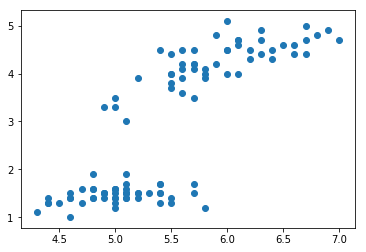

In [8]:
def get_iris_X_y(shuffle_instances=True):
    '''
    The Iris dataset is a famous dataset comprising flower characteristics.
    We'll recast as a binary classification task.
    '''
    iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   header=None)
    y = iris_df.iloc[0:100, 4].values 
    y = np.where(y == 'Iris-setosa', -1, 1)
    y[y<0] = 0 # convert to 1/0 labels
    X = iris_df.iloc[0:100, [0, 2]].values
    if shuffle_instances:
        X, y = shuffle(X, y, random_state=0)
    return X, y

X,y= get_iris_X_y()
plt.scatter(X[:,0],X[:,1])

## Q2 "Pure" NumPy Implementation

In Q1, we derived the gradient:

$ \begin{equation}
    - \nabla_{\bf w} LL = - \sum_i (y_i - \sigma({\bf w} \cdot {\bf x}_i)) {\bf x}_i
\end{equation}
$

Given Data: 100 pts | Training Set Size: 90 pts | Validation set 10.0% of Data ( 10 )pts.

Random Weights Initialized: [0.4553776  0.04752991] 


.....// Training //.....


 For Epoch: 0 With Training Loss: 55.086179 | Validation Loss: 7.319224

 For Epoch: 50 With Training Loss: 9.560128 | Validation Loss: 1.242406

 For Epoch: 100 With Training Loss: 5.291998 | Validation Loss: 0.7254

 For Epoch: 150 With Training Loss: 3.671516 | Validation Loss: 0.518709

 Training Accuracy: 1.0 | Validation Accuracy: 1.0


 ............................ 

Optimized Weights:  [-1.26909498  2.52472962]


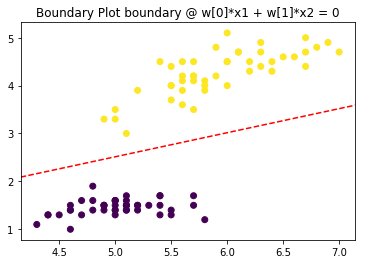

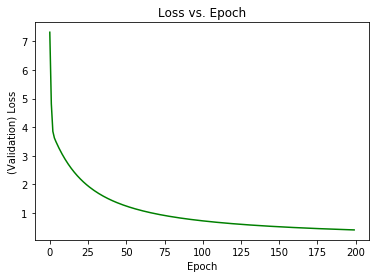

In [3]:
def get_val(X,y, val_p=.1):
    """
    Get randomly shuffles X and y into Training and Validation sets 
    
    """
    sample_size= int(val_p*len(X))
    stacked=np.column_stack((X, y))
    l_stacked=stacked.tolist()
    validation = np.array([l_stacked.pop(random.randrange(len(l_stacked))) for _ in range(sample_size)])
    stacked = np.array(l_stacked)
    X_train= stacked[:,0:2]
    y_train= np.array([int(i) for i in stacked[:,2]])
    val_x= validation[:,0:2]
    val_y= np.array([int(i) for i in validation[:,2]])
    return X_train,y_train,val_x,val_y

def sigmoid(x):
    """
    Params:
    ---
    
    x: nxd numpy array 
    
    Output:
    ---
    Result of Sigmoid "Squishing" Function: Array of vals in rang {0,1}
    """
    return 1/(1+np.exp(-x))

def predict(weights,x):
    """
    Params:
    ---
    weights: 1d array of weights. 
    x: nd numpy array 
    
    Output:
    ---
    nx1 array with the predicted class probabilities 
    Computes dot product and then applies sigmoid function 
    """
    prediction= sigmoid(np.dot(x,weights))
    return prediction

def log_loss(y,prediction):
    """
    Logistic Regression Loss Function Defined 
    
    Params:
    ---
    
    y= actual class (nx1 array)
    prediction= predicted class (nx1 array)
    
    Returns:
    Average of the loss for a entire set (epoch of data)
    """
    return -.5*np.sum(y*np.log(prediction)+(1-y)*np.log(1-prediction))

def loss_plot(val_loss):
    """
    Show Log Loss Plot 
    """
    plt.figure(1)
    x= range(len(val_loss))
    plt.plot(x,val_loss,color='g')
    plt.xlabel('Epoch')
    plt.ylabel('(Validation) Loss')
    plt.title("Loss vs. Epoch")
    plt.draw()
    
def get_acc(weights,X_train,val_x,y_train,val_y):
    
    """
    Get accuracy (of training and Validation sets) using Sklearn 
    
    """
    train_predictions= np.array([int(np.round(v)) for v in predict(weights,X_train)])
    val_predictions=np.array([int(np.round(v)) for v in predict(weights,val_x)])
    
    print('\n Training Accuracy: {}'.format(accuracy_score(train_predictions, y_train)),'| Validation Accuracy: {}\n'.format(accuracy_score(val_predictions, val_y)))

def boundary_plot(X_train,y_train,w_guess):
    """
    Show how the optimized weights form a boundary. 
    
    """
    plt.figure(0)
    plt.scatter(X_train[:,0], X_train[:,1], c= y_train.ravel())
    ax = plt.gca()
    ax.autoscale(False)
    x_vals = np.array(ax.get_xlim())
    y_vals = -(x_vals * w_guess[0])/w_guess[1]
    plt.plot(x_vals, y_vals, '--', c="red")
    plt.title("Boundary Plot boundary @ w[0]*x1 + w[1]*x2 = 0")
    plt.draw()

###### MAIN FUNCTION #####    
def LR_SGD(X, y, epochs, alpha=0.1, print_every=10, val_p=0.1):
    '''
    Parameters
    ---
    X: (n x d) matrix comprising n instances with d dimensions/features.
    y: (n x 1) vector comprising labels (0/1)
    epochs: number of epochs to run
    alpha: the learning rate
    val_p: the percentage of data to use as a validation set

    Returns:
    weights, array of epoch log-likelihoods
    '''
    # Isolate the Data into Train and Validation 
    X_train,y_train,val_x,val_y= get_val(X,y,val_p)
    
    
    print ("Given Data:", len(X), "pts | Training Set Size:",len(X_train),'pts | Validation set {}% of Data ('.format(np.round(val_p*100)),len(val_x),')pts.')
    weights= np.random.rand(X.shape[1]) #initialize random weights (no bias taken into account)
    print ("\nRandom Weights Initialized: {} \n".format(weights))
    print ("\n.....// Training //.....\n")
    training_loss=[]
    validation_loss=[]
    for epoch in range(epochs): #loop through all training data
        
        prediction= predict(weights,X_train) #sig(weights*x) gives the class probaility 
        train_loss= log_loss(y_train,prediction)# Loss is defined per epoch as average of the loss per X,y
        val_loss= log_loss(val_y,predict(weights,val_x))
        
        dw=np.dot((prediction - y_train),X_train)
        weights = weights - alpha*(dw/len(y_train))
        validation_loss.append(val_loss)
        
        if epoch % print_every == 0:
            print ("\n For Epoch:", epoch, "With Training Loss:", np.around(train_loss,decimals=6), "| Validation Loss:",np.around(val_loss,decimals=6))

    get_acc(weights,X_train,val_x,y_train,val_y) 
    boundary_plot(X_train,y_train,weights)
    loss_plot(validation_loss)  
    
    return weights 

########## RUN FUNCTION #######################
np_weights = LR_SGD(X, y, epochs=200, alpha=0.1, print_every=50, val_p=.1)
print ("\n ............................ \n")
print ("Optimized Weights: ", np_weights)

## Q3: TensorFlow

In [4]:
import tensorflow as tf
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


For Epoch 0
Training loss is: 1.60 | Validation loss is: 1.79
coef estimates:  [[-0.56237036]
 [ 0.04032376]]

For Epoch 2000
Training loss is: 0.31 | Validation loss is: 0.31
coef estimates:  [[-0.42147073]
 [ 0.8803428 ]]

For Epoch 4000
Training loss is: 0.22 | Validation loss is: 0.21
coef estimates:  [[-0.62733793]
 [ 1.2705231 ]]

For Epoch 6000
Training loss is: 0.16 | Validation loss is: 0.16
coef estimates:  [[-0.7770712]
 [ 1.5566307]]

For Epoch 8000
Training loss is: 0.13 | Validation loss is: 0.13
coef estimates:  [[-0.89381707]
 [ 1.7808496 ]]


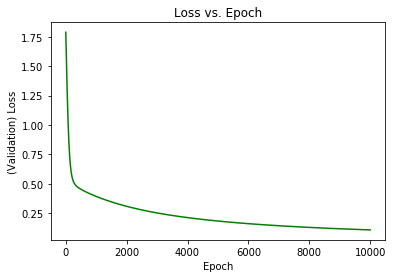

In [17]:
def LR_TF(X, y, epochs, print_every, val_p=0.2):
    """
    Log Reg using Pytorch. Returns optimized weights given:
    
    X: nd array of feature values 
    y: 1d array of target values 
    epochs: number of epochs 
    print_every: get training and val loss every n epochs 
    val_p= % of data that is validation float [0 1]
    """
    X_train,y_train,val_x,val_y= get_val(X,y,val_p)
    train_count = X_train.shape[0] #the number of samples to given
    val_count = val_x.shape[0]

    y_train = y_train.reshape(train_count,1) #reshape to n x 1 
    val_y = val_y.reshape(val_count,1) #reshape to n x 1 

    #declare weights
    weights = tf.Variable(tf.random_normal(shape=[2, 1]))
    #create place holders 
    x_tf = tf.placeholder(dtype=tf.float32, shape=[None, 2])
    y_tf = tf.placeholder(dtype=tf.float32, shape=[None, 1])
  



    #y_hat = x * weights 
    y_hat = tf.matmul(x_tf, weights)
    #loss= binary cross entropy 
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat, labels=y_tf))
    #select optimizer 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

    #begin session 

    init = tf.global_variables_initializer()
    loss_vals=[]
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(epochs):
            sess.run(optimizer, feed_dict={x_tf: X_train, y_tf: y_train})
            train_loss = sess.run(loss, feed_dict={x_tf: X_train, y_tf: y_train})
            val_loss = sess.run(loss, feed_dict={x_tf: val_x, y_tf: val_y})
            loss_vals.append(val_loss)
            if epoch % print_every == 0:
                print("\nFor Epoch {}".format(epoch))
                print("Training loss is: {:.2f}".format(train_loss),"| Validation loss is: {:.2f}".format(val_loss))
                print("coef estimates: " ,weights.eval())
                tf_weights= np.array(weights.eval())
                    
    loss_plot(loss_vals)
    return tf_weights
   
tf_weights=LR_TF(X, y,epochs=10000, print_every=2000, val_p=0.2)

## Keras

Using TensorFlow backend.


Ideal Model Parameters: [array([[-1.5306588],
       [ 3.0454788]], dtype=float32)]


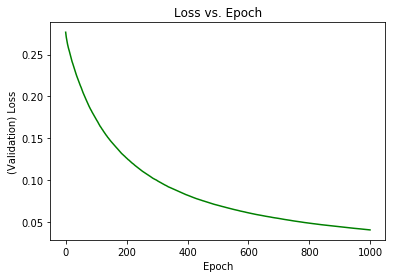

In [6]:
import keras
from keras.models import Sequential 
from keras.layers import Dense

def LR_Keras(X, y, epochs, verbose,val_p=.1):
    """
    Log Reg using kears. Returns optimized weights given:
    
    X: nd array of feature values 
    y: 1d array of target values 
    epochs: number of epochs 
    val_p= % of data that is validation float [0 1]
    
    """
    
    X_train,y_train,val_x,val_y= get_val(X,y,val_p)
    model = Sequential()
    model.add(Dense(1, use_bias=False,activation='sigmoid', input_dim=X.shape[1]))
    model.compile(optimizer='sgd', loss='binary_crossentropy')
    train_history=model.fit(X_train, y_train, epochs=epochs,verbose=verbose,  validation_data=(val_x,val_y))
    print ("Ideal Model Parameters:",model.get_weights())
    loss_plot(train_history.history['val_loss'])
    return model.get_weights()

keras_weights=LR_Keras(X, y, epochs=1000,verbose=0,val_p=.1)[0]

## PyTorch (w/NN)

In [7]:
! pip install torch

For Epoch 0 : Train Loss: 1.2076926231384277 | Val Loss: 0.7639962434768677
For Epoch 20000 : Train Loss: 0.03624248504638672 | Val Loss: 0.02344047650694847
For Epoch 40000 : Train Loss: 0.020528919994831085 | Val Loss: 0.01185634359717369
For Epoch 60000 : Train Loss: 0.014749206602573395 | Val Loss: 0.007947580888867378
For Epoch 80000 : Train Loss: 0.011679025366902351 | Val Loss: 0.005984914489090443
[-2.438721   4.7338314]


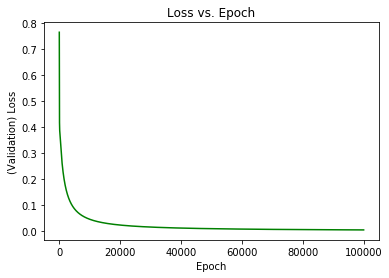

In [8]:
import torch
import torch.nn as nn
from torch.autograd import Variable

def LR_torch(X, y, epochs, print_every, val_p=0.1):
    """
    Log Reg using Pytorch. Returns optimized weights given:
    
    Params:
    ---
    
    X: nd array of feature values 
    y: 1d array of target values 
    epochs: number of epochs 
    print_every: get training and val loss every n epochs 
    val_p= % of data that is validation float [0 1]
    """

    class LogReg(nn.Module):

        def __init__(self):
            super(LogReg, self).__init__() 
            self.linear = nn.Linear(2, 1, bias=False)

        def forward(self, X):
            
            return torch.sigmoid(self.linear(X))

    X_train,y_train,val_x,val_y= get_val(X,y,val_p)
    train_count = X_train.shape[0]
    val_count = val_x.shape[0]
    y_train = y_train.reshape(train_count,1)
    val_y = val_y.reshape(val_count,1) #reshape to n x 1 

    L = nn.BCELoss() 
    model = LogReg()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    from torch.autograd import Variable
    X_t = Variable(torch.from_numpy(X_train)).float()
    y_t = Variable(torch.from_numpy(y_train)).float()
    X_v = Variable(torch.from_numpy(val_x)).float()
    y_v = Variable(torch.from_numpy(val_y)).float()
    loss_vals=[]
    for epoch in range(epochs):
        optimizer.zero_grad() # clear out gradients (stored in vars)
        predictions = model(X_t)
        predictions_val = model(X_v) 
        loss = L(predictions, y_t)
        loss_v = L(predictions_val, y_v)
        loss.backward()
        loss_v.backward()
        loss_vals.append(loss_v)
        optimizer.step()
        
        if epoch % print_every == 0:
          print("For Epoch",epoch,": Train Loss:",loss.data.item(),"| Val Loss:",loss_v.data.item())
    loss_plot(loss_vals)
    return np.array(list(model.parameters())[0].detach())[0]

pytorch_weights=LR_torch(X, y, epochs=100000, print_every= 20000, val_p=0.1)
print (pytorch_weights)

In [9]:
pytorch_weights

array([-2.438721 ,  4.7338314], dtype=float32)

In [18]:
weights= [np_weights, keras_weights, tf_weights, pytorch_weights]
titles= ['Numpy coded weights', 'Keras weights', 'Tensorflow weights', 'Pytorch weights']
print("Ratio of Weights all are approximately ~ [-2]")
for i,w in enumerate(weights):
    print("\n"+titles[i]+" ratio:")
    print(w[1]/w[0])


Ratio of Weights all are approximately ~ [-2]

Numpy coded weights ratio:
-1.9893937478464947

Keras weights ratio:
[-1.9896523]

Tensorflow weights ratio:
[-1.9924095]

Pytorch weights ratio:
-1.9411124


Don't forget to rerun all your cells now that you're done!